In [1]:
%matplotlib inline
# modified notebook from http://scikit-learn.org/stable/auto_examples/svm/plot_iris.html


# Plot different Supervised classifers in the iris dataset


Comparison of different classifiers on a 2D projection of the iris
dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width


In [2]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.tree import DecisionTreeClassifier

flag_data = 3
flag_features = 0
x_train= []
x_val = []
y_train = []
y_val = []

# import some data to play with
iris = datasets.load_iris()
y = iris.target

# we only take the first two features. We could
# avoid this ugly slicing by using a two-dim dataset
if flag_features == 0:
    select_features = iris.data[:, :2]
    x1_label = 'Sepal length'
    x2_label = 'Sepal width'
elif flag_features == 1:
    select_features = iris.data[:, 1:3]
    x1_label = 'Sepal width'
    x2_label = 'Petal length'

if flag_data == 0:
    # take all dataset as training set
    x_train = select_features
    y_train = iris.target
elif flag_data == 1:
    # balanced case all three classes have the same ammount of samples
    for k in range(3):
        id_class = iris.target == k
        label_ = iris.target[id_class]
        data_ = select_features[id_class,:]
        x_train.extend(data_[:40])
        y_train.extend(label_[:40])
        x_val.extend(data_[40:])
        y_val.extend(label_[40:])
elif flag_data == 2:
    # imbalanced case where one class is 
    for k in range(3):
        if k == 1:
            id_class = iris.target == k
            label_ = iris.target[id_class]
            data_ = select_features[id_class,:]
            x_train.extend(data_[:10])
            y_train.extend(label_[:10])
            x_val.extend(data_[40:])
            y_val.extend(label_[40:])
        else:
            id_class = iris.target == k
            label_ = iris.target[id_class]
            data_ = select_features[id_class,:]
            x_train.extend(data_[:40])
            y_train.extend(label_[:40])
            x_val.extend(data_[40:])
            y_val.extend(label_[40:])
elif flag_data == 3:
    # overfitting case
    for k in range(3):
        id_class = iris.target == k
        label_ = iris.target[id_class]
        data_ = select_features[id_class,:]
        x_train.extend(data_[:5])
        y_train.extend(label_[:5])
        x_val.extend(data_[40:])
        y_val.extend(label_[40:])
x_train = np.array(x_train)
x_val = np.array(x_val)

Automatically created module for IPython interactive environment


## Dataset information

Lets plot a histogram of the classes from the dataset

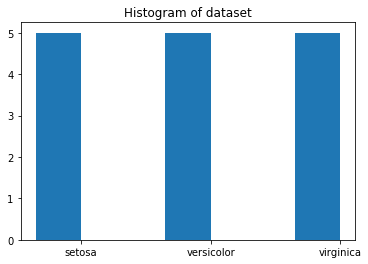

total number of training samples: 15


In [3]:
hist, _ = np.histogram(y_train, bins=[0, 1, 2, 3])
plt.figure()
fig, ax = plt.subplots(1,1)

width = 0.35
ind = np.arange(np.max(y_train) + 1)
ax.bar(ind, hist, 0.35)
ax.set_title('Histogram of dataset')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('setosa', 'versicolor', 'virginica'))

plt.show()
print('total number of training samples: {}'.format(np.sum(hist)))

## Train classifiers

In [4]:
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
svc_classifier = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)

# Radial kernel
C = 1.0
rbf_classifier = svm.SVC(kernel='rbf', C=C).fit(x_train, y_train)

# Decision trees
dt_classifier = DecisionTreeClassifier().fit(x_train, y_train)


h = .02  # step size in the mesh
# create a mesh to plot in
x_min, x_max = x_train[:, 0].min() - 1, x_train[:, 0].max() + 1
y_min, y_max = x_train[:, 1].min() - 1, x_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

## Plot decision boundaries

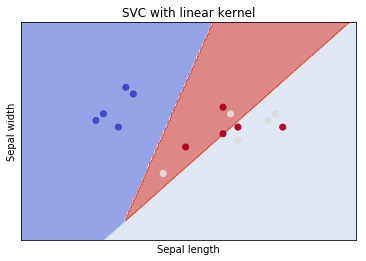

In [5]:
# title for the plots
title = 'SVC with linear kernel'

Z = svc_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel(x1_label)
plt.ylabel(x2_label)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(title)

plt.show()

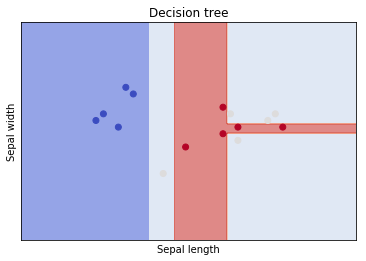

In [6]:
title = 'Decision tree'

Z = dt_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel(x1_label)
plt.ylabel(x2_label)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(title)

plt.show()

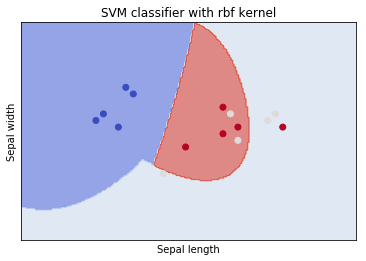

In [7]:
title = 'SVM classifier with rbf kernel'

Z = rbf_classifier.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.6)

# Plot also the training points
plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, cmap=plt.cm.coolwarm)
plt.xlabel(x1_label)
plt.ylabel(x2_label)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title(title)

plt.show()

## Accuracy on training and validation set

Let's compute each the accuracy for each set

In [8]:
# Training set accuracy
print('Training set')
acc = svc_classifier.score(x_train, y_train)
print("Linear SVM accuracy: ", acc)
acc = dt_classifier.score(x_train, y_train)
print("Decision Tree accuracy: ", acc)
acc = rbf_classifier.score(x_train, y_train)
print("Radial Kernel accuracy: ", acc)


# Validation set accuracy
print('Validation set')
acc = svc_classifier.score(x_val, y_val)
print("Linear SVM accuracy: ", acc)
acc = dt_classifier.score(x_val, y_val)
print("Decision Tree accuracy: ", acc)
acc = rbf_classifier.score(x_val, y_val)
print("Radial Kernel accuracy: ", acc)

Training set
('Linear SVM accuracy: ', 0.73333333333333328)
('Decision Tree accuracy: ', 1.0)
('Radial Kernel accuracy: ', 0.80000000000000004)
Validation set
('Linear SVM accuracy: ', 0.46666666666666667)
('Decision Tree accuracy: ', 0.59999999999999998)
('Radial Kernel accuracy: ', 0.5)


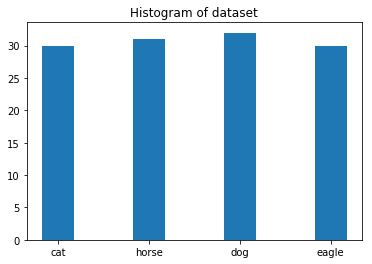

In [10]:
plt.figure()
fig, ax = plt.subplots(1,1)

hist_data = np.array([30,31,32,30])

width = 0.35
ind = np.arange(4)
ax.bar(ind, hist_data, width)
ax.set_title('Histogram of dataset')
ax.set_xticks(ind)
ax.set_xticklabels(('cat', 'horse', 'dog', 'eagle'))

plt.show()